In [1]:
!pip install yfinance --upgrade



In [2]:


import yfinance as yf

from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)
stock = "GOOG"
google_data = yf.download(stock, start, end)



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


DATA CLEANING AND ANALYSIS

In [3]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-05-03,5.607076,5.655663,5.486352,5.499491,713873782
2005-05-04,5.664339,5.698548,5.627155,5.632857,485151677
2005-05-05,5.626659,5.667314,5.599392,5.667314,301509913
2005-05-06,5.652441,5.682931,5.614017,5.661860,271570110
2005-05-09,5.602862,5.664339,5.588236,5.651945,222302131


In [4]:

google_data.shape


(5033, 5)

In [5]:


google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,51.323533,51.851071,50.781339,51.302390,1.019030e+08
std,48.846594,49.374479,48.317023,48.818905,1.315091e+08
min,5.602862,5.646987,5.486352,5.499491,1.584340e+05
25%,13.636556,13.807105,13.477160,13.634820,2.602600e+07
50%,28.951508,29.148534,28.769390,29.018509,4.746600e+07
75%,71.109192,71.686464,70.181079,71.113176,1.242279e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [6]:
google_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-05-03 to 2025-05-02
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5033 non-null   float64
 1   (High, GOOG)    5033 non-null   float64
 2   (Low, GOOG)     5033 non-null   float64
 3   (Open, GOOG)    5033 non-null   float64
 4   (Volume, GOOG)  5033 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [7]:


google_data.isna().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [8]:

import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

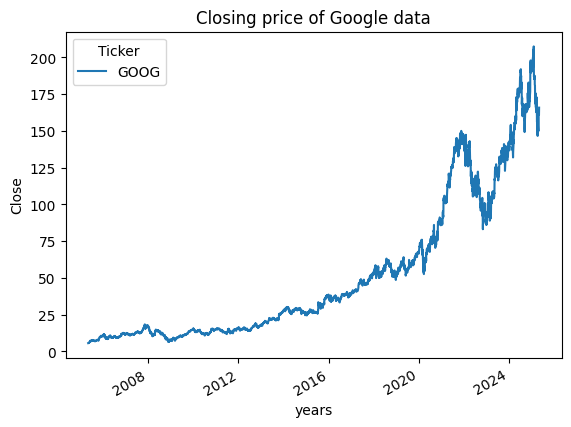

In [9]:


plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")


In [10]:


def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [11]:


google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

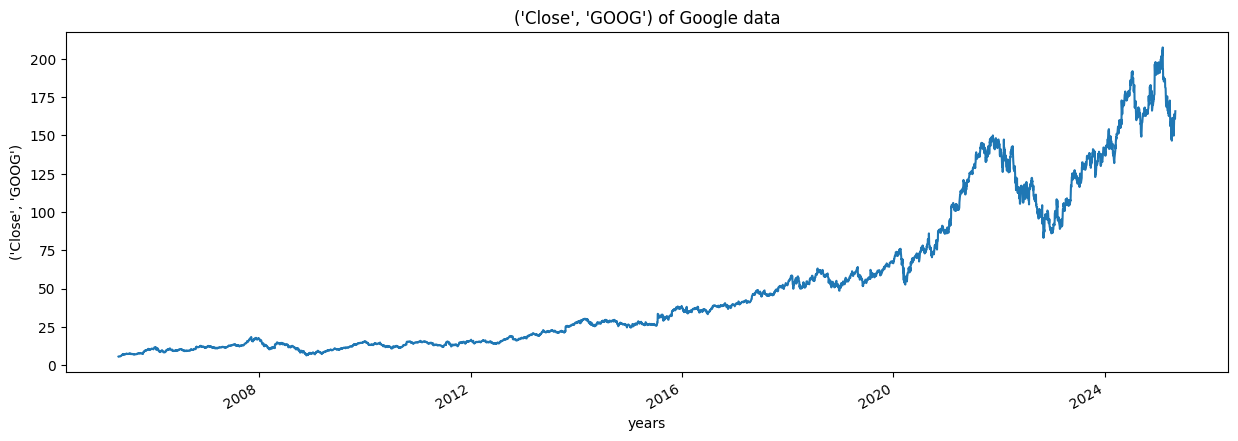

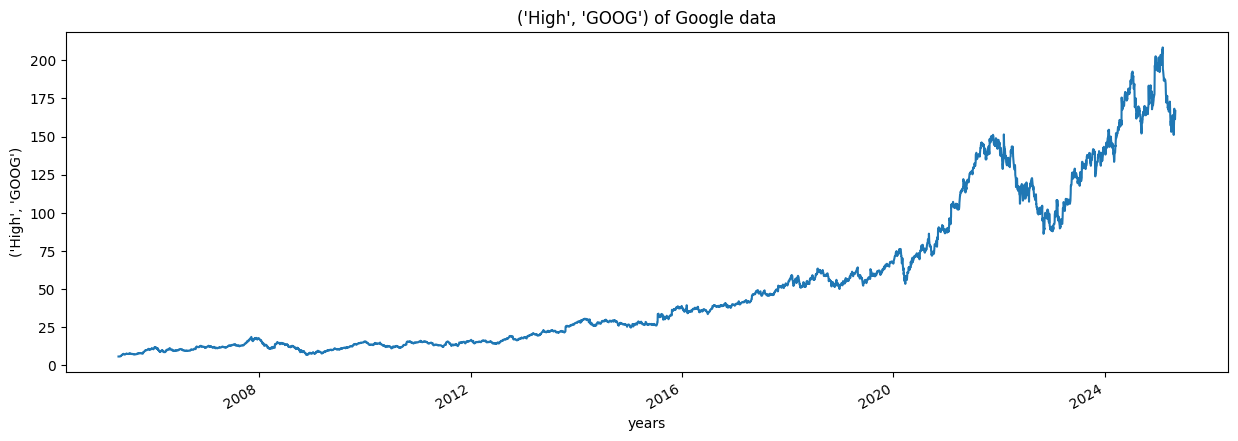

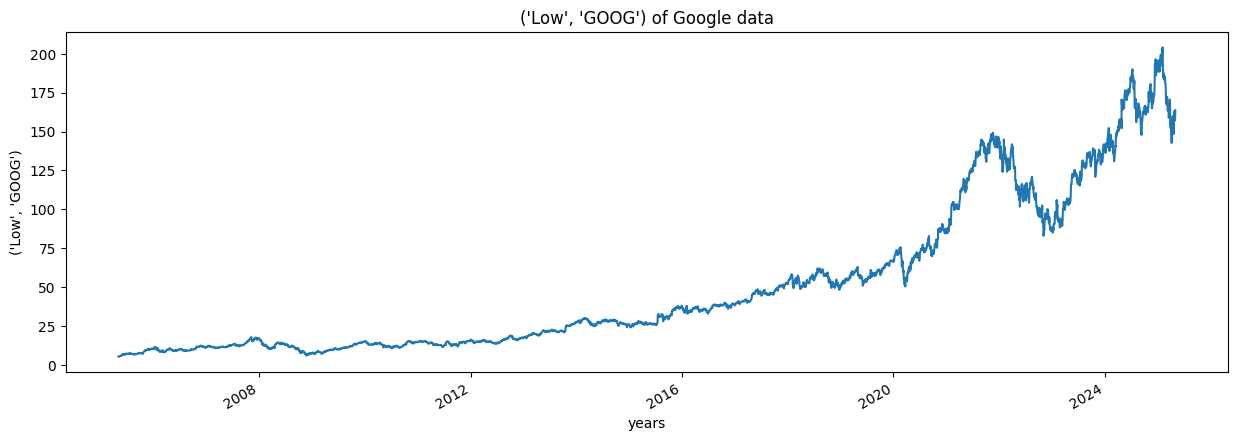

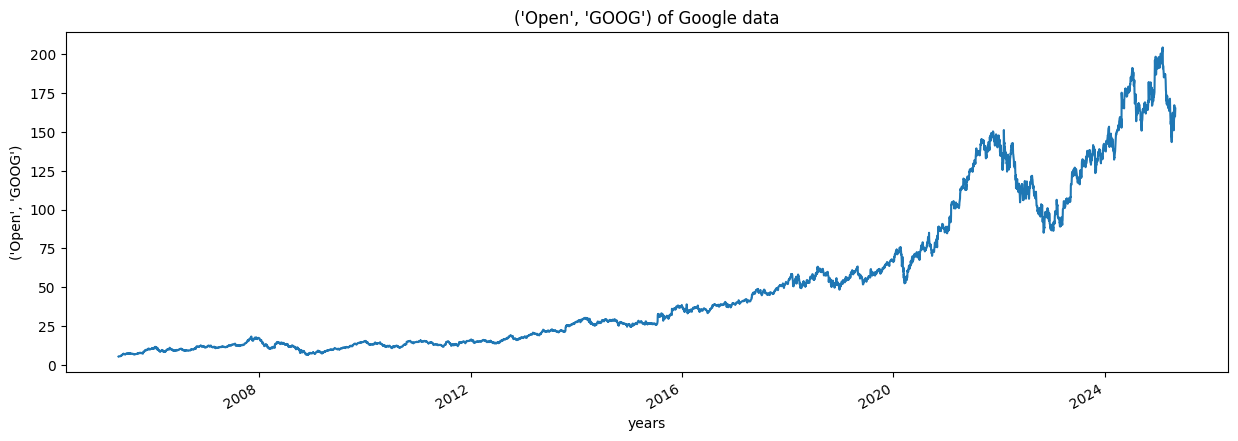

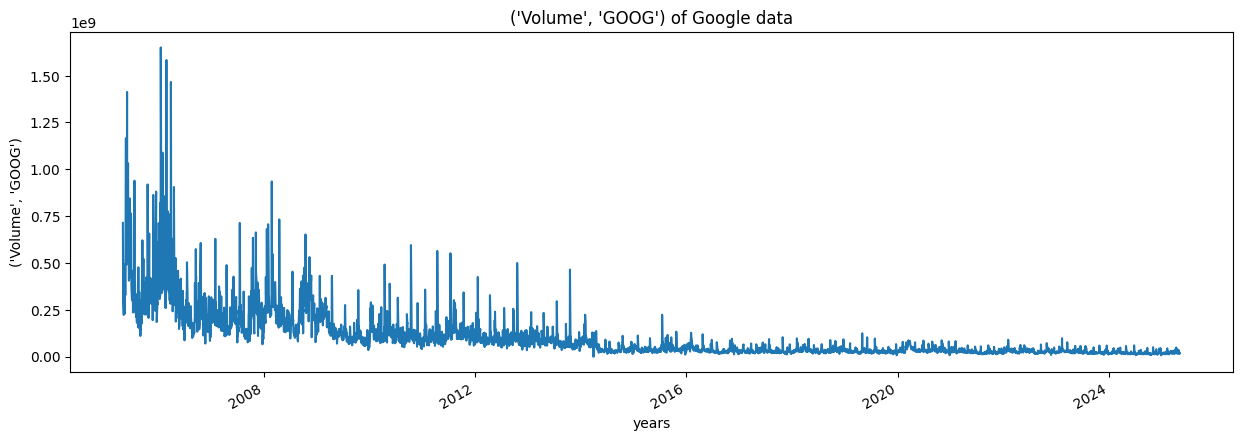

In [12]:

for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)



In [14]:
import pandas as pd


In [15]:
for i in range(2005,2026):
    print(i,list(google_data.index.year).count(i))


2005 169
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
2025 83


MOVING AVERAGE CONCEPT

In [16]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [17]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2006-04-24,NaN
2006-04-25,NaN
2006-04-26,NaN
2006-04-27,NaN
2006-04-28,8.537592


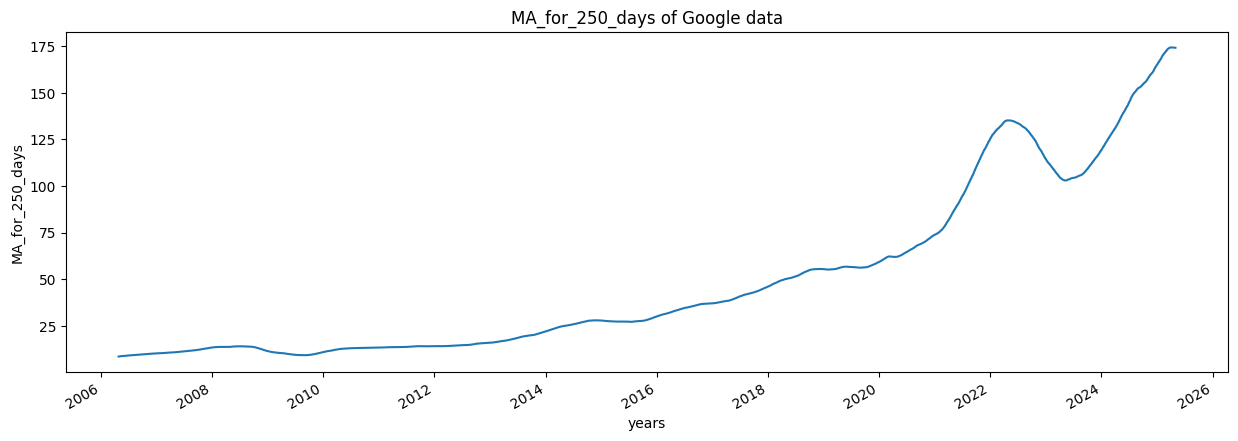

In [18]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')


<Figure size 640x480 with 0 Axes>

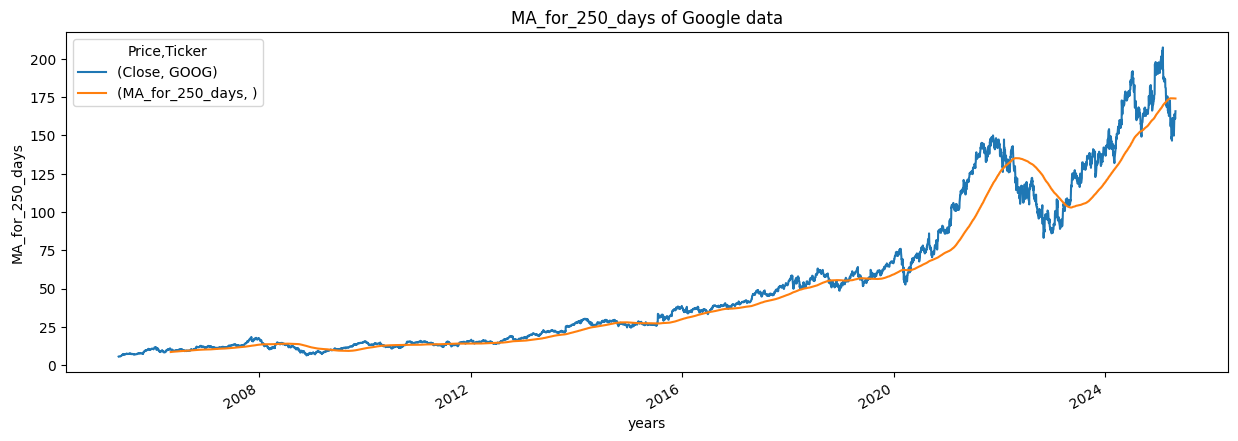

In [19]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')


<Figure size 640x480 with 0 Axes>

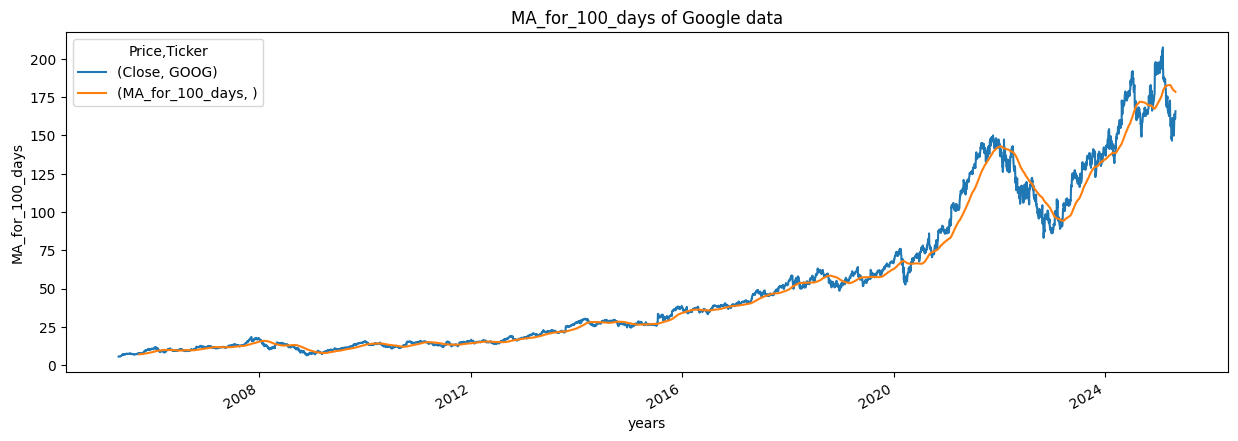

In [20]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')


<Figure size 640x480 with 0 Axes>

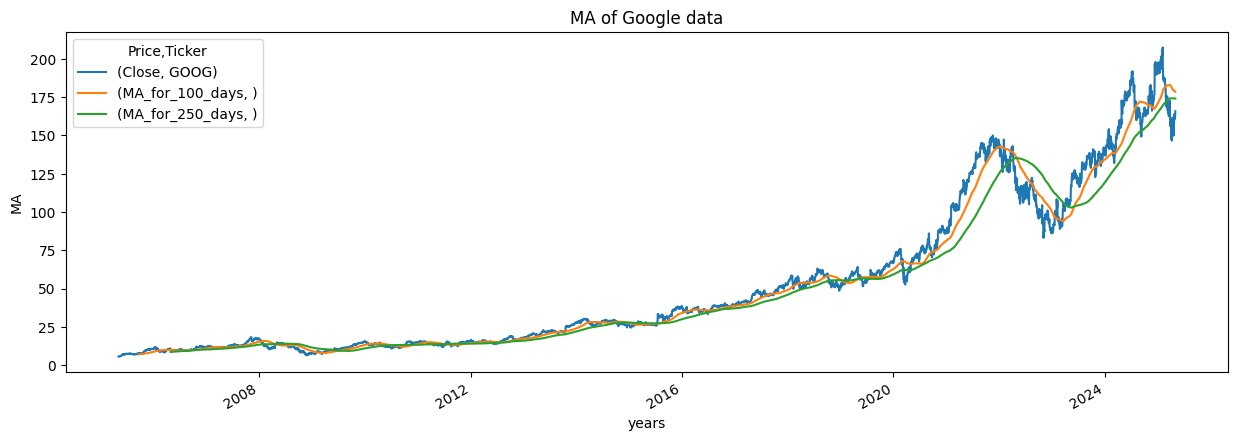

In [21]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [22]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()


Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-05-03,5.607076,NaN
2005-05-04,5.664339,0.010213
2005-05-05,5.626659,-0.006652
2005-05-06,5.652441,0.004582
2005-05-09,5.602862,-0.008771


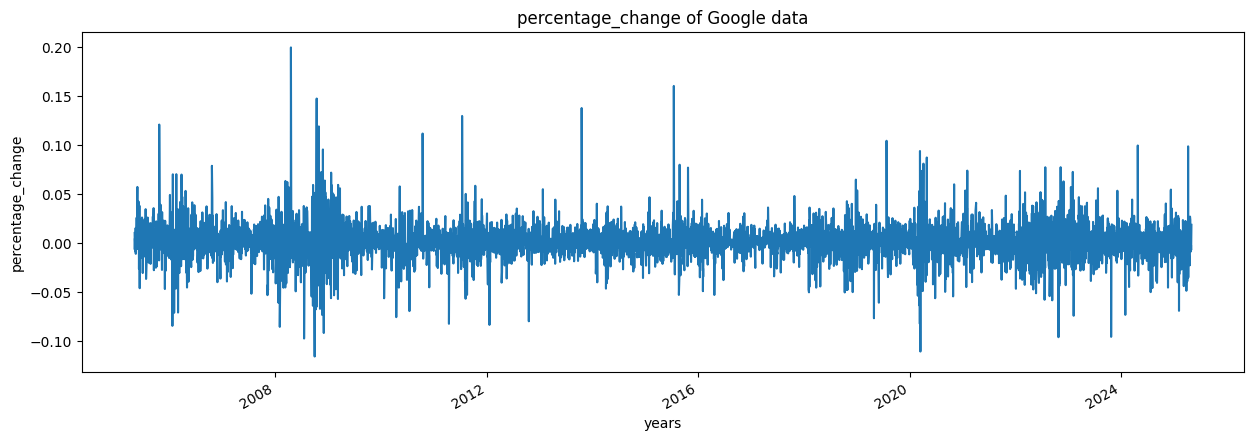

In [23]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

DATA PREPROCESSING

In [25]:
Adj_close_price = google_data[['Close']]

In [26]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([207.47363281]), array([5.60286188]))

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data


array([[2.08761614e-05],
       [3.04534962e-04],
       [1.17884882e-04],
       ...,
       [7.69240325e-01],
       [7.78652257e-01],
       [7.93612344e-01]])

In [28]:
len(scaled_data)


5033

In [29]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)


In [30]:


x_data[0],y_data[0]

(array([[2.08761614e-05],
        [3.04534962e-04],
        [1.17884882e-04],
        [2.45596064e-04],
        [0.00000000e+00],
        [2.18580827e-04],
        [6.47144470e-04],
        [3.31554922e-04],
        [3.95406970e-04],
        [6.17670297e-04],
        [8.73092660e-04],
        [1.61356099e-03],
        [1.61601284e-03],
        [1.91441345e-03],
        [3.61393093e-03],
        [3.68147021e-03],
        [4.27212763e-03],
        [4.07442060e-03],
        [4.90944344e-03],
        [6.29337374e-03],
        [7.61098833e-03],
        [7.59871018e-03],
        [6.66053718e-03],
        [7.97201506e-03],
        [8.23971085e-03],
        [6.57457832e-03],
        [7.40345972e-03],
        [6.93560506e-03],
        [6.96630752e-03],
        [6.42599098e-03],
        [5.99006470e-03],
        [6.31424754e-03],
        [6.66544797e-03],
        [7.45135348e-03],
        [7.59134281e-03],
        [7.77062553e-03],
        [7.82097350e-03],
        [8.74687071e-03],
        [9.5

In [31]:


int(len(x_data)*0.7)


3453

In [50]:
5033-100-int(len(x_data)*0.7)


1480

In [51]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]


In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


BUILIDING NEURAL NETWORK

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM



In [54]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:

model.compile(optimizer='adam', loss='mean_squared_error')


In [56]:


model.fit(x_train, y_train, batch_size=1, epochs = 2)


Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 252s 72ms/step - loss: 1.7883e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 253s 70ms/step - loss: 4.8299e-05


In [57]:


model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

PREDICTION THE TEST DATA

In [58]:
predictions = model.predict(x_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step


In [59]:
predictions




array([[0.23715223],
       [0.2370771 ],
       [0.23774031],
       ...,
       [0.73723966],
       [0.7319881 ],
       [0.73494625]], dtype=float32)

In [60]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions


array([[ 53.47697 ],
       [ 53.461803],
       [ 53.59568 ],
       ...,
       [154.43001 ],
       [153.36986 ],
       [153.96704 ]], dtype=float32)

In [61]:


inv_y_test = scaler.inverse_transform(y_test)
inv_y_test



array([[ 54.01167679],
       [ 54.36749268],
       [ 54.9198761 ],
       ...,
       [160.88999939],
       [162.78999329],
       [165.80999756]])

In [62]:


rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))


In [63]:
rmse

np.float64(5.570269879553386)

In [64]:


ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()


,original_test_data,predictions
Date,,
2019-06-14,54.011677,53.476971
2019-06-17,54.367493,53.461803
2019-06-18,54.919876,53.595680
2019-06-19,54.856670,53.950729
2019-06-20,55.309032,54.108574


<Figure size 640x480 with 0 Axes>

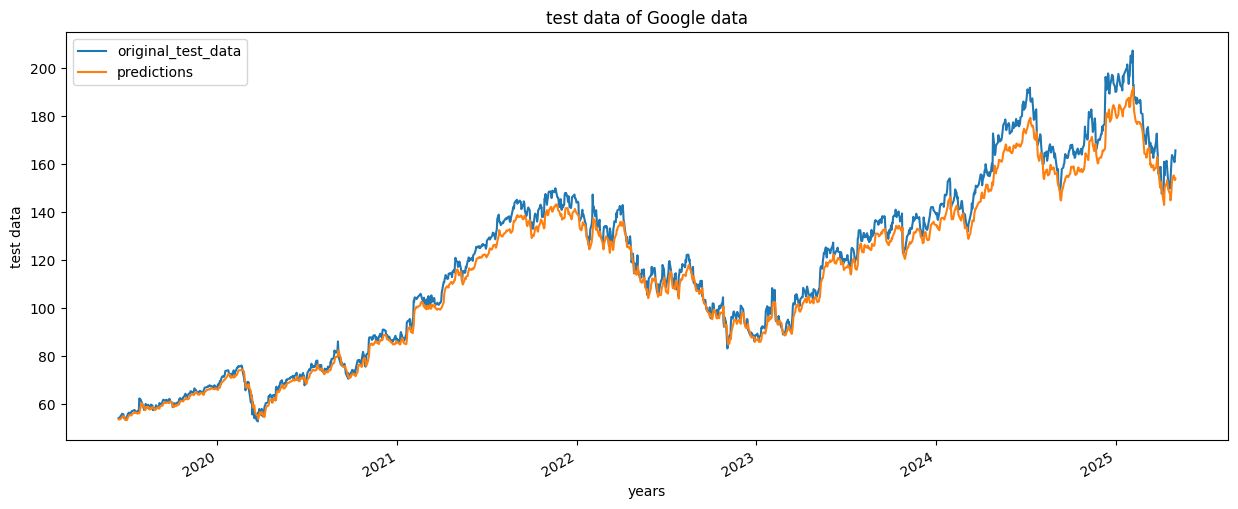

In [65]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

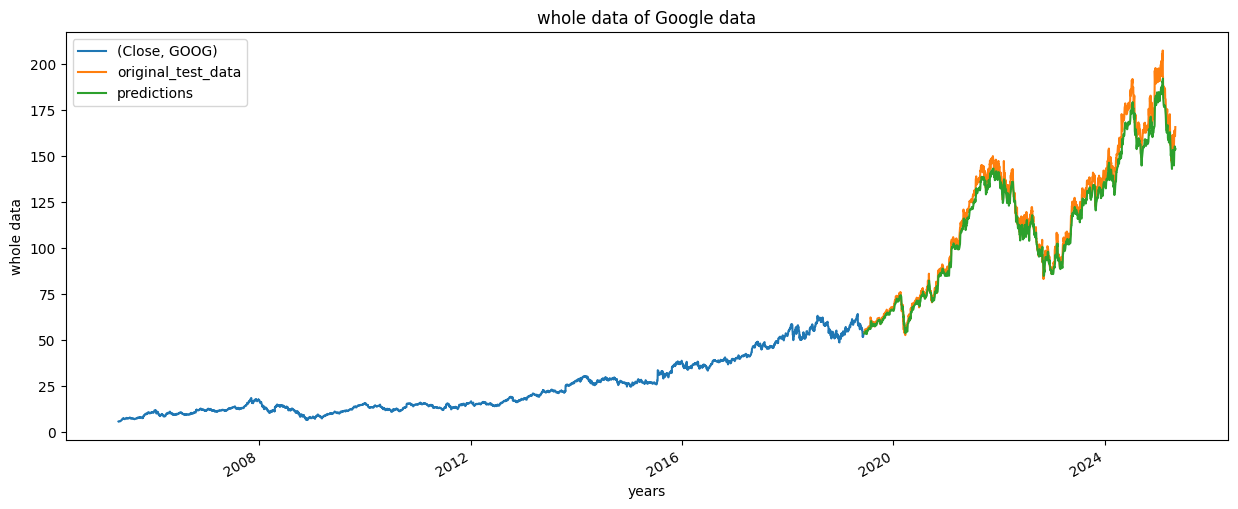

In [66]:


plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [67]:
model.save("Latest_stock_price_model.keras")
